# Customer Churn Prediction Using Decision Tree

## Import Required Libraries

We will be building a classification model based on our dataset. We will also visualize our findings for better understanding of our data and model. For that we will require the following libabries.

- `pandas` for data handling
- `numpy` for numerical operations
- Specific modules from `sklearn` for model related operations as required
- `matplotlib.pyplot` and `seaborn` for data visualization

The following lines of codes will import the required libraries.

In [1]:
# Import Libraries for Data handling
import pandas as pd

# Import Libraries for Numerical Operations
import numpy as np


# Import Libraries for Machine Learning
from sklearn.tree import DecisionTreeClassifier, plot_tree # For building and plotting a classification Tree
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay # To create and plot a confusion matrix
from sklearn.metrics import classification_report # For generating the classification report
from sklearn.metrics import roc_curve, roc_auc_score # For creating and displaying the ROC curve and AUC value
from sklearn.model_selection import GridSearchCV # Fore grid search and finding best paramters for model
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # For the data preporecessing and encoding

# Import Libraries for Data Visualization
import matplotlib.pyplot as plt



## Import the data

In [2]:
df = pd.read_csv('churn.csv')

## Explore Dataset

In [3]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


## Check Dataset

In [4]:
#check of missing values
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

None

We can see that among the 20 features present in our dataset, there are 16 features with numeric data types, and 5 features with object data type. 3 of the object type is 
categorical feature and other 2 are string features.

This is why we are using a classifier algorithm such as decision tree to predict outcome. Let's explore the features in the dataset. 

Feature Variable:

- 0   Account_Length: the number of days the customer has the subscription with the telecom company
- 1   Vmail_Message: the total number of voicemails the customer has sent
- 2   Day_Mins: the number of minutes the customer has talked over the phone in daytime
- 3   Eve_Mins: the number of minutes the customer has talked over the phone in evening
- 4   Night_Mins: the number of minutes the customer has talked over the phone in nighttime
- 5   Intl_Mins: the number of minutes the customer has talked over the phone on an international call
- 6   CustServ_Calls: the number of customer service calls the customer made
- 7   Churn: yes and no - indicating whether or not the customer has churned
- 8   Intl_Plan: yes and no - indicating whether or not the customer has international plan or not       
- 9   Vmail_Plan:  yes and no - indicating whether or not the customer has voicemail plan or not
- 10  Day_Calls: the number of calls the customer has made in daytime
- 11  Day_Charge: the amount of bill in the customer has paid in daytime calls
- 12  Eve_Calls: the number of calls the customer has made in evening
- 13  eve_Charge: the amount of bill in the customer has paid in evening calls
- 14  Night_Calls: the number of calls the customer has made in night time
- 15  Night_Charge: the amount of bill in the customer has paid in night time calls
- 16  Intl_Calls: the number of international calls the customer has made
- 17  Intl_Charge: the total amount of bill in the customer has paid on international calls
- 18  State: the state customer lives in
- 19  Area_Code: the area code of the customer
- 20  Phone: phone number of the customer

Since we have identified our dataset features, we can now classify them as numeric or categoric features based on the description of the data.

- **Numeric Features:** `Account_Length`, `Vmail_Message`, `Day_Mins`, `Eve_Mins`, `Night_Mins`, `Intl_Mins`, `CustServ_Calls`, `Day_Calls`, `Day_Charge`, `Eve_Calls`
- **Categoric Features:** `Intl_Plan`, `Vmail_Plan`
- **String Feature:** `State`, `Phone`


### Target Variable
The target feature in the dataset for our machine learning is the `Churn` feature representing whether a customer would churn or not.


## Dealing with Missing Values

To deal with the missing values, we have two different ways: one of them is to remove the entries containing the missing values and the other one is to replace the missing values.

#### Checking for the missing values

We can check missing data in the the features by using `isnull` function to check null values in each entry in column and use `sum` function to sum up the missing values in each column.

In [5]:
print(df.isnull().sum())

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64


##### Observation:
> there are no missing values in dataset

## Modifying Dataset

In the dataset we have features `State`, `Phone` and `Area_code` which contains customer's personal info which is not necessary for training the model.

In addition, in the dataset, the call count, call charge, and minutes talked are divided between the time of day between `day`, `eve` and `night`. We will will join them together.

In [6]:
# Merging Day, Eve, Night Calls into Total Calls
df['Total_Calls'] = df['Day_Calls'] + df['Eve_Calls'] + df['Night_Calls'] 
df = df.drop(['Day_Calls','Eve_Calls','Night_Calls'], axis=1)

# Merging Day, Eve, Night Mins into Total Mins 
df['Total_mins'] = df['Day_Mins'] + df['Eve_Mins'] + df['Night_Mins'] 
df = df.drop(['Day_Mins','Eve_Mins','Night_Mins'], axis=1)

# Merging Day, Eve, Night Mins into Total Charge
df['Total_Charge'] = df['Day_Charge'] + df['Eve_Charge'] + df['Night_Charge'] 
df = df.drop(['Day_Charge','Eve_Charge','Night_Charge'], axis=1)

# Droping 
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

In [7]:

col_seq = ['Account_Length', 'Total_Calls', 'Total_mins', 'Total_Charge',
 'Intl_Calls', 'Intl_Charge', 'Intl_Mins', 'CustServ_Calls', 'Vmail_Message',
       'Churn', 'Intl_Plan', 'Vmail_Plan']
df = df[col_seq]

display(df.head())


,Account_Length,Total_Calls,Total_mins,Total_Charge,Intl_Calls,Intl_Charge,Intl_Mins,CustServ_Calls,Vmail_Message,Churn,Intl_Plan,Vmail_Plan
0,128,300,707.2,72.86,3,2.70,10.0,1,25,no,no,yes
1,107,329,611.5,55.54,3,3.70,13.7,1,26,no,no,yes
2,137,328,527.2,59.00,5,3.29,12.2,0,0,no,no,no
3,84,248,558.2,65.02,7,1.78,6.6,2,0,no,yes,no
4,75,356,501.9,49.36,3,2.73,10.1,3,0,no,yes,no


## Encoding Categorical Features

In our dataset there are 2 categorical feature `Intl_Plan` and `Vmail_Plan` we will encode them by using both `one hot encoding` and `label encoding`.

we will look at matrices of models trained with both using one hot encoding and label encoding to see which one performs better. 

our target variable is also a categorical feature so we will need to change it to binary.

In [8]:
# Making Values in churn column binary

def binary_convert(x):
    if "yes" in x:
        return 1
    if "no" in x:
        return 0

df['Churn'] = df['Churn'].apply(binary_convert)

# df = df.replace({'Churn': {'no':0, 'yes':1}})

display(df.head())


,Account_Length,Total_Calls,Total_mins,Total_Charge,Intl_Calls,Intl_Charge,Intl_Mins,CustServ_Calls,Vmail_Message,Churn,Intl_Plan,Vmail_Plan
0,128,300,707.2,72.86,3,2.70,10.0,1,25,0,no,yes
1,107,329,611.5,55.54,3,3.70,13.7,1,26,0,no,yes
2,137,328,527.2,59.00,5,3.29,12.2,0,0,0,no,no
3,84,248,558.2,65.02,7,1.78,6.6,2,0,0,yes,no
4,75,356,501.9,49.36,3,2.73,10.1,3,0,0,yes,no


### Label encoding

In [9]:
# Creating a copy of dataframe that uses label encoding
df_le = df.copy()

LE = LabelEncoder()

# Label Encoding the categorical feature
df_le['Intl_Plan'] = LE.fit_transform(df['Intl_Plan'])
df_le['Vmail_Plan'] = LE.fit_transform(df['Vmail_Plan'])

# Display the result of encoding
# display(df_le.head())
# display(df_le.shape)

### One Hot encoding

In [10]:
# Creating a copy of dataframe that uses one-hot encoding
df_one = df.copy()

# One-hot Encoding the categorical feature
df_one = pd.get_dummies(df_one, columns= ['Intl_Plan', 'Vmail_Plan'])

# Display the result of encoding
# display(df_one.head())
# display(df_one.shape)

### Data Scaling 

In [11]:
# normalize the feature columns
scaler = MinMaxScaler()

for col in df_le.columns:
    df_le[col] = scaler.fit_transform(df_le[[col]])

display(df_le.head())


,Account_Length,Total_Calls,Total_mins,Total_Charge,Intl_Calls,Intl_Charge,Intl_Mins,CustServ_Calls,Vmail_Message,Churn,Intl_Plan,Vmail_Plan
0,0.524793,0.504505,0.717966,0.728575,0.15,0.500000,0.500,0.111111,0.490196,0.0,0.0,1.0
1,0.438017,0.635135,0.558916,0.489942,0.15,0.685185,0.685,0.111111,0.509804,0.0,0.0,1.0
2,0.561983,0.630631,0.418813,0.537614,0.25,0.609259,0.610,0.000000,0.000000,0.0,0.0,0.0
3,0.342975,0.270270,0.470334,0.620557,0.35,0.329630,0.330,0.222222,0.000000,0.0,1.0,0.0
4,0.305785,0.756757,0.376766,0.404795,0.15,0.505556,0.505,0.333333,0.000000,0.0,1.0,0.0


## Separating dataset

### Separating feature and target variable

We processed our data now we separate feature and target variable

In [12]:
# Create the Features dataframe from one hot encoded dataframe
x_one = df_one.drop(columns = ["Churn"], axis = 1).copy()

# Create the Target Dataframe
y_one = df_one[["Churn"]].copy()

# Create the Features dataframe from label encoded dataframe
X_le = df_le.drop(columns = ["Churn"], axis = 1).copy()

# Create the Target Dataframe
y_le = df_le[["Churn"]].copy()



### Splitting Train set and Test set

Next we split Train set and Test set.

We will use `train_test_split()` function from `Scikit Learn`. we will use 80% of the data for train the model and 20% data to test the trained model

In terms of parameters used we will use 

- `random_state = 47`

- `startify = True`

we use `random_state` so that we don't use randomly use 80% data from the dataset to train the model and get different result everytime we train the model

Next we use `stratify = True` so that we have same ratio of `true` and `false`, in this case patient with heart disease and without heart disease stays same within the test data set and training data set.

In [13]:
# Using one hot encoded dataset

# x = x_one
# y = y_one

# Using label encoded dataset

x = X_le
y = y_le

#Split the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 47, stratify = y )

# Display Split Data shapes
print("X_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2666, 11)
y_train shape:  (2666, 1)
X_test shape:  (667, 11)
y_test shape:  (667, 1)


## Train Decision Tree Model 

Finally, it's time to train our decision tree model to predict if a patient has heart disease or not.

Firstly we initialize an instance of `DecisionTreeClassifier()` model.
then we fit our training data to the model. 

In [14]:
# Create a model instance
model = DecisionTreeClassifier(random_state = 47)

# Fit data to model
model = model.fit(x_train, y_train)


Training is done for our model. Now we can see a diagram of the decision tree we've just made using the `plot_tree()` function from `SciKit Learn`.

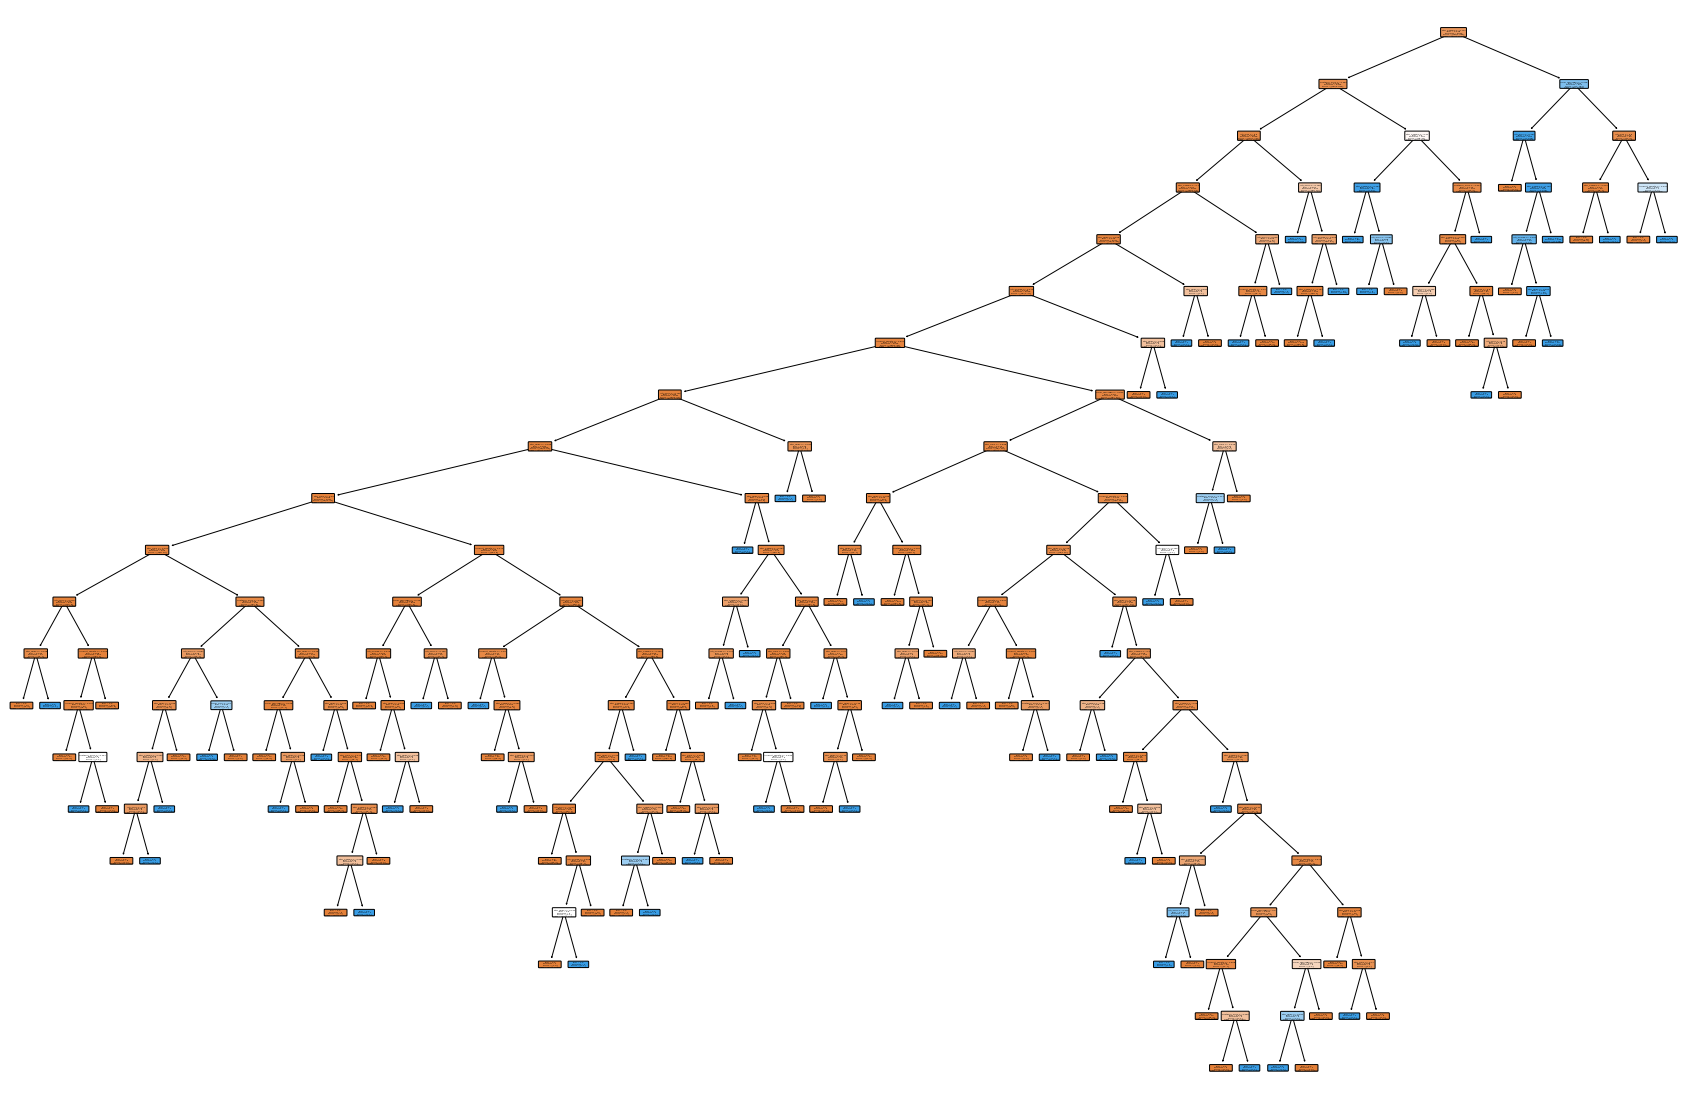

In [15]:
# Plot the Tree Diagram
plt.figure(figsize = (30,20))
plot_tree(model,
          filled = True,
          rounded = True,
          class_names = ["Wont' Churn", "Will Churn"],
          feature_names = x.columns
         )

# Show the plot
plt.show()

## Predict Results

In [16]:
# Predict from the test set features
y_pred = model.predict(x_test)

## Evaluate Model Performance

We will use different matrices to evaluate and test our models performance namely confusion matrix and and ROC curve AUC. 

### Confusion Matrix

Confusion matrix is an easy way to visualize how the model is performing. It shows how good our model is performing at predicting.

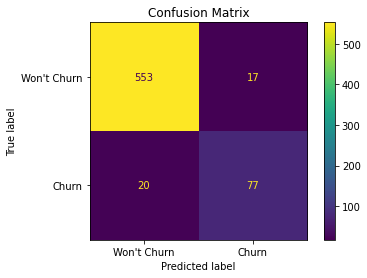

In [17]:
confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Won't Churn", "Churn"]).plot()
plt.title("Confusion Matrix")
plt.show()

the classification matrix shows that our trained model is performing to a very high degree. The true positive and true negative values are reasonably higher than the false positive and false negative values.

### Classification Report

We can calculate `f1 score`, `recall`, `precision`, `support`.

precision: Precision can be seen as a measure of a classifier’s exactness.

recall: Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances.

f1 score: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

support: Support is the number of actual occurrences of the class in the specified dataset.

We will use function `classification_report()` in `sciKit Learn` to print a classification report containing all the above mentioned matrices 

In [18]:
# Generate and diaplay the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       570
         1.0       0.82      0.79      0.81        97

    accuracy                           0.94       667
   macro avg       0.89      0.88      0.89       667
weighted avg       0.94      0.94      0.94       667



The report shows the precision, recall and the f1-score values are above 80%, which means the model is performing very well on the test dataset.

### ROC Curve and AUC Score


ROC curve is a visual representation of a model's performance at different classification thresholds. The AUC value is a numerical representation of the model's performance.

The ROC curve and AUC for our model can be plotted using the following 

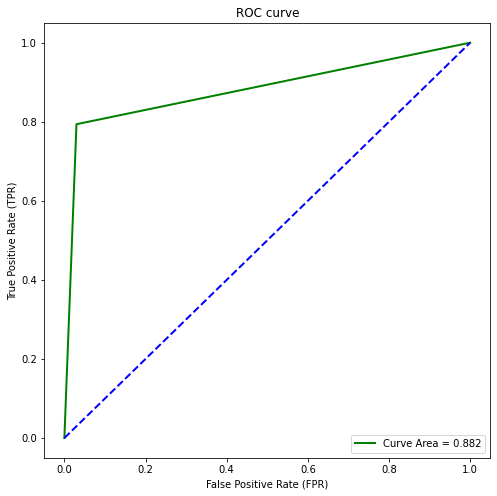

In [19]:
# Get the prediction probabilites
y_pred_proba = model.predict_proba(x_test)[:,1]

# Generate the ROC values
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

# Evaluate AUC value
auc = np.round(roc_auc_score(y_test, y_pred), 3)

# Plot the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Observation:

The ROC curve above shows that the model will perform best when the TPR or Recall value of the model is just near to 80% and the FPR value will be around 16%. The AUC value is 0.883, which is very good considering our preliminary model.